In [1]:
# Add all necessary imports here
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.reload_library()
plt.style.use("ggplot")

In [2]:
from IPython.core.display import HTML
## align the output charts to the center
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


### Cover Slide

# What is the problem?


<center>
<img src="img/saluslab.png" width="100%" />
</center>

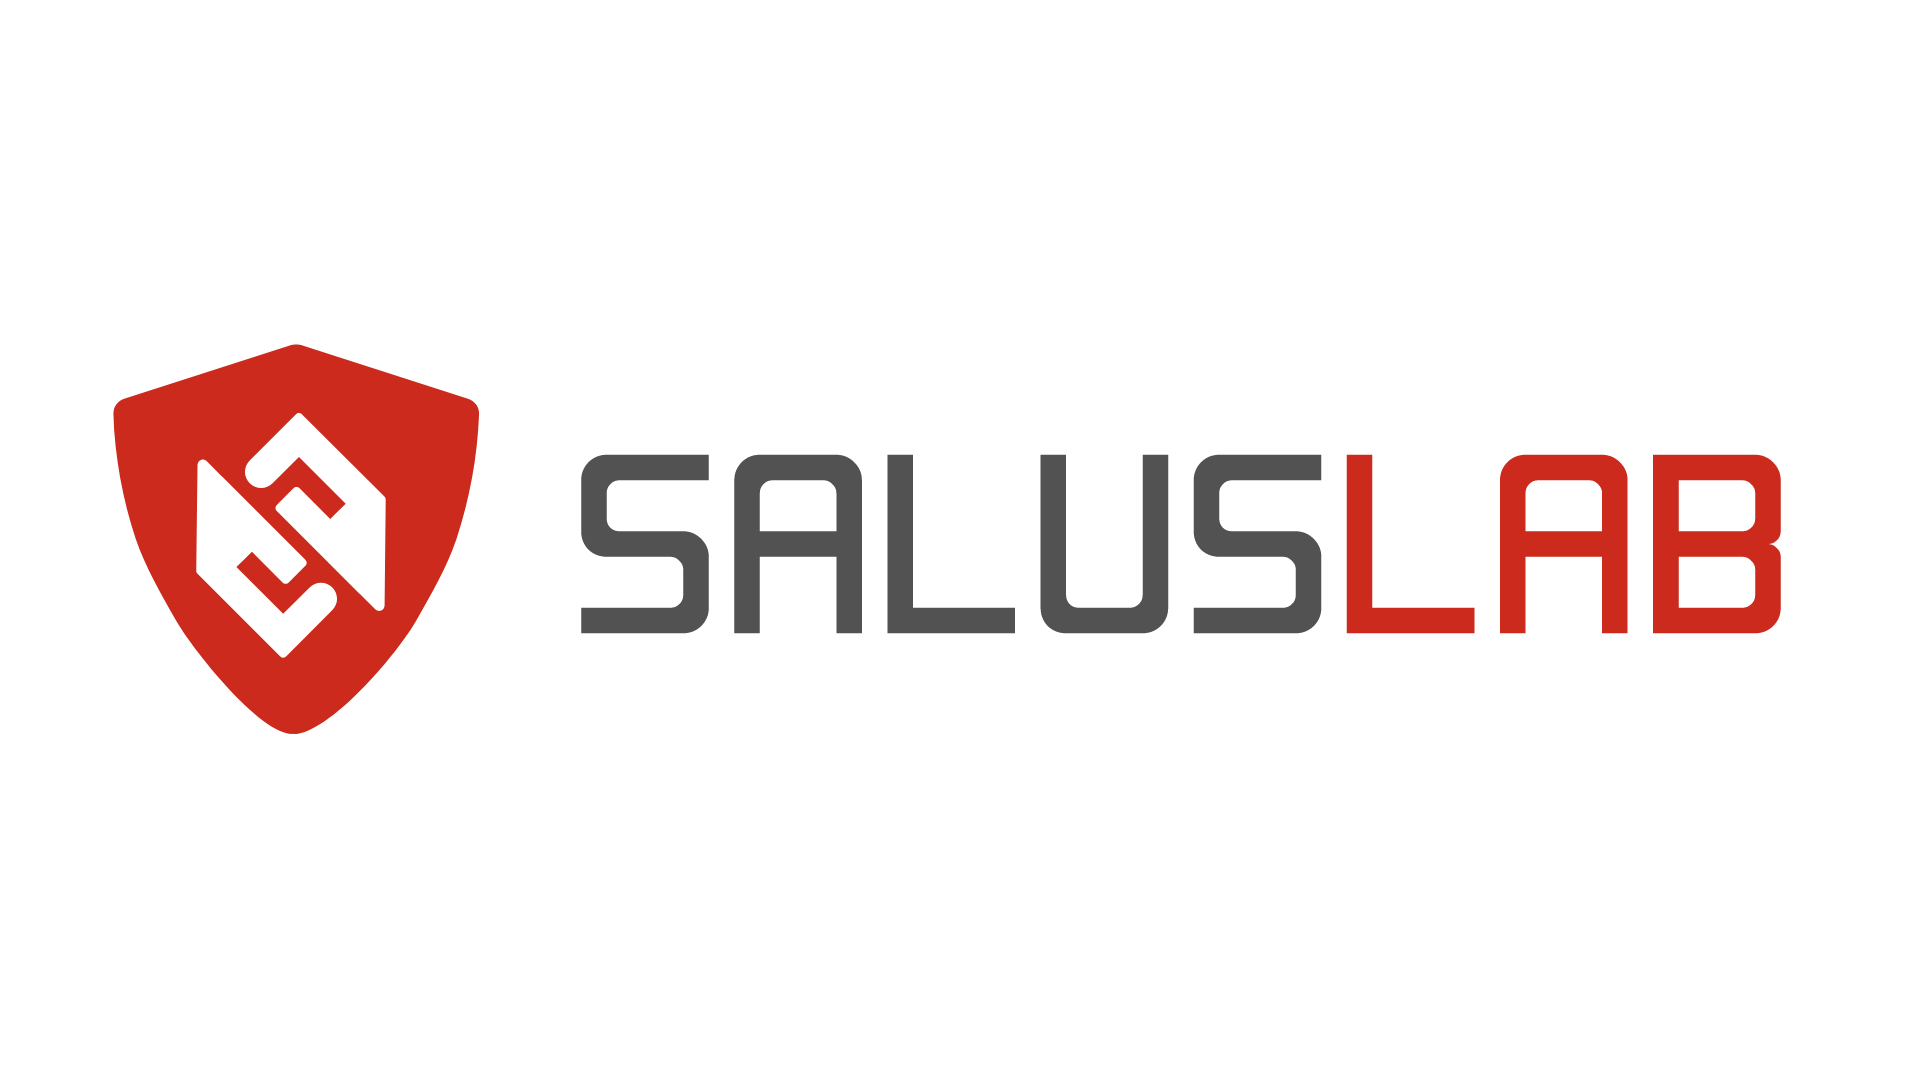

In [4]:
from IPython.display import Image
Image(filename='img/saluslab.png', width=400)

# Import the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from IPython.display import display, HTML



In [10]:
sns.set_theme('notebook', style='darkgrid')
plt.style.use("ggplot")
color_palette = sns.color_palette("blend:#525252,#E9E8E4,#CB2A1D,#000", 10)
print(color_palette.as_hex())
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
color_palette.as_hex()



['#525252', '#848382', '#b5b5b2', '#e9e8e4', '#dfa9a2', '#d5695f', '#cb2a1d', '#861c13', '#430e0a', '#000000']


['#525252',
 '#848382',
 '#b5b5b2',
 '#e9e8e4',
 '#dfa9a2',
 '#d5695f',
 '#cb2a1d',
 '#861c13',
 '#430e0a',
 '#000000']

# Read the data

In [7]:
# read all the data sets
lockbit = pd.read_csv('data/lockbit2-v5.csv')
bianlian = pd.read_csv('data/BianLian.csv')
blackbasta = pd.read_csv('data/BlackBasta-v2.csv')
playnews = pd.read_csv('data/PlayNews.csv')
royal = pd.read_csv('data/Royal.csv')
vicesociety = pd.read_csv('data/ViceSociety.csv')
# concatenate all the data sets
df_attacked = pd.concat([lockbit, bianlian, blackbasta, playnews, royal, vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_attacked.drop(['date_added', 'progress'], axis=1, inplace=True)


In [8]:
unattacked_lockbit = pd.read_csv('data/unattacked-lockbit.csv')
unattacked_bianlian = pd.read_csv('data/unattacked-bianlian.csv')
unattacked_blackbasta = pd.read_csv('data/unattacked-blackbasta.csv')
unattacked_playnews = pd.read_csv('data/unattacked-play-news.csv')
unattacked_royal = pd.read_csv('data/unattacked-royal.csv')
unattacked_vicesociety = pd.read_csv('data/unattacked-vice-society.csv')
# concatenate all the data sets
df_unattacked = pd.concat([unattacked_lockbit, unattacked_bianlian, unattacked_blackbasta, unattacked_playnews, unattacked_royal, unattacked_vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_unattacked.drop(['date_added', 'progress'], axis=1, inplace=True)

### Divider

# Clean the data

## general cleaning (applied to the whole dataset)

In [11]:
df_attacked['ispublished'] = df_attacked['ispublished'].apply(lambda x: False if x == "0%" or x==False else True)
df_attacked['ispublished'].unique()

array([ True, False])

In [12]:
# TODO: add the code to process the revenue range, then plot it
from utils import clean_unique_values, clean_revenue_range

# get the unique values for revenue_range column
unique_values = df_attacked['revenue_range'].unique()
print(unique_values)
# clean 'revenue_range' column
clean_range, formalized_values = clean_unique_values(unique_values)
print(clean_range)
print(formalized_values)
# apply the clean_revenue_range function to the revenue_range column
df_attacked['revenue_range'] = df_attacked['revenue_range'].apply(lambda x: clean_revenue_range(x, clean_range, formalized_values))
df_attacked['revenue_range'].unique()

[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M' '$129,7M' '$516M' '$303,7M' '$19,2M' '$168M' '$5M' '$37.2M'
 '$22M' '$879M' '$5B' '$9M' '$19M' '$343 Million' '$5 Million'
 '$$653 Million' '$14' '$14M' '$669M' '$33M' '$310M' '$19' '$10M'
 '$7 Million']
[(200000000.0, 1000000000.0), (1000000000.0, inf), (0.0, 1000000.0), (10000000.0, 50000000.0), (1000000.0, 10000000.0), (100000000.0, 200000000.0), (50000000.0, 100000000.0)]
['200M - 1B', '> 1B', '0 - 1M', '10M - 50M', '1M - 10M', '100M - 200M', '50M - 100M']


array([nan, '200M - 1B', '> 1B', '0 - 1M', '10M - 50M', '1M - 10M',
       '100M - 200M', '50M - 100M'], dtype=object)

In [13]:
# TODO: Process the "employee range column"
# get the unique values for revenue_range column
unique_values = df_attacked['employees_range'].unique()
print(unique_values)
# clean 'revenue_range' column
clean_range, formalized_values = clean_unique_values(unique_values)
print(clean_range)
print(formalized_values)
# apply the clean_revenue_range function to the revenue_range column
df_attacked['employees_range'] = df_attacked['employees_range'].apply(lambda x: clean_revenue_range(x, clean_range, formalized_values))
df_attacked['employees_range'].unique()

[nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000' '264' '1900' '8,312' '451' '2014'
 '100' '~1000' '25' '18' '75' '2,978' '5' '2000' '41' '94' '50' '725'
 '1.559' '10' '45' '6208' '223' '259' '4,178 Employees' '126' '1420' '51'
 '43' '4' '16' '20']
[(1000.0, 5000.0), (5000.0, 10000.0), (1.0, 10.0), (200.0, 500.0), (10.0, 50.0), (50.0, 200.0), (500.0, 1000.0), (10000.0, inf)]
['1,000 - 5,000', '5,000 - 10,000', '1 - 10', '200 - 500', '10 - 50', '50 - 200', '500 - 1,000', '> 10,000']


array([nan, '1,000 - 5,000', '5,000 - 10,000', '1 - 10', '200 - 500',
       '10 - 50', '50 - 200', '500 - 1,000', '> 10,000'], dtype=object)

# specific cleaning (applied only when visualizing that column)

In [14]:
# create a copy of the data frame
df_attacked_industry = df_attacked.copy()
# drop the null values from the "industry" column
df_attacked_industry.dropna(subset=['industry'], inplace=True)

In [15]:
# create a copy of the data frame
df_attacked_revenue= df_attacked.copy()
# drop the null values from the "revenue" column
df_attacked_revenue.dropna(subset=['revenue_range'], inplace=True)

## Descriptive analysis of the data through plots

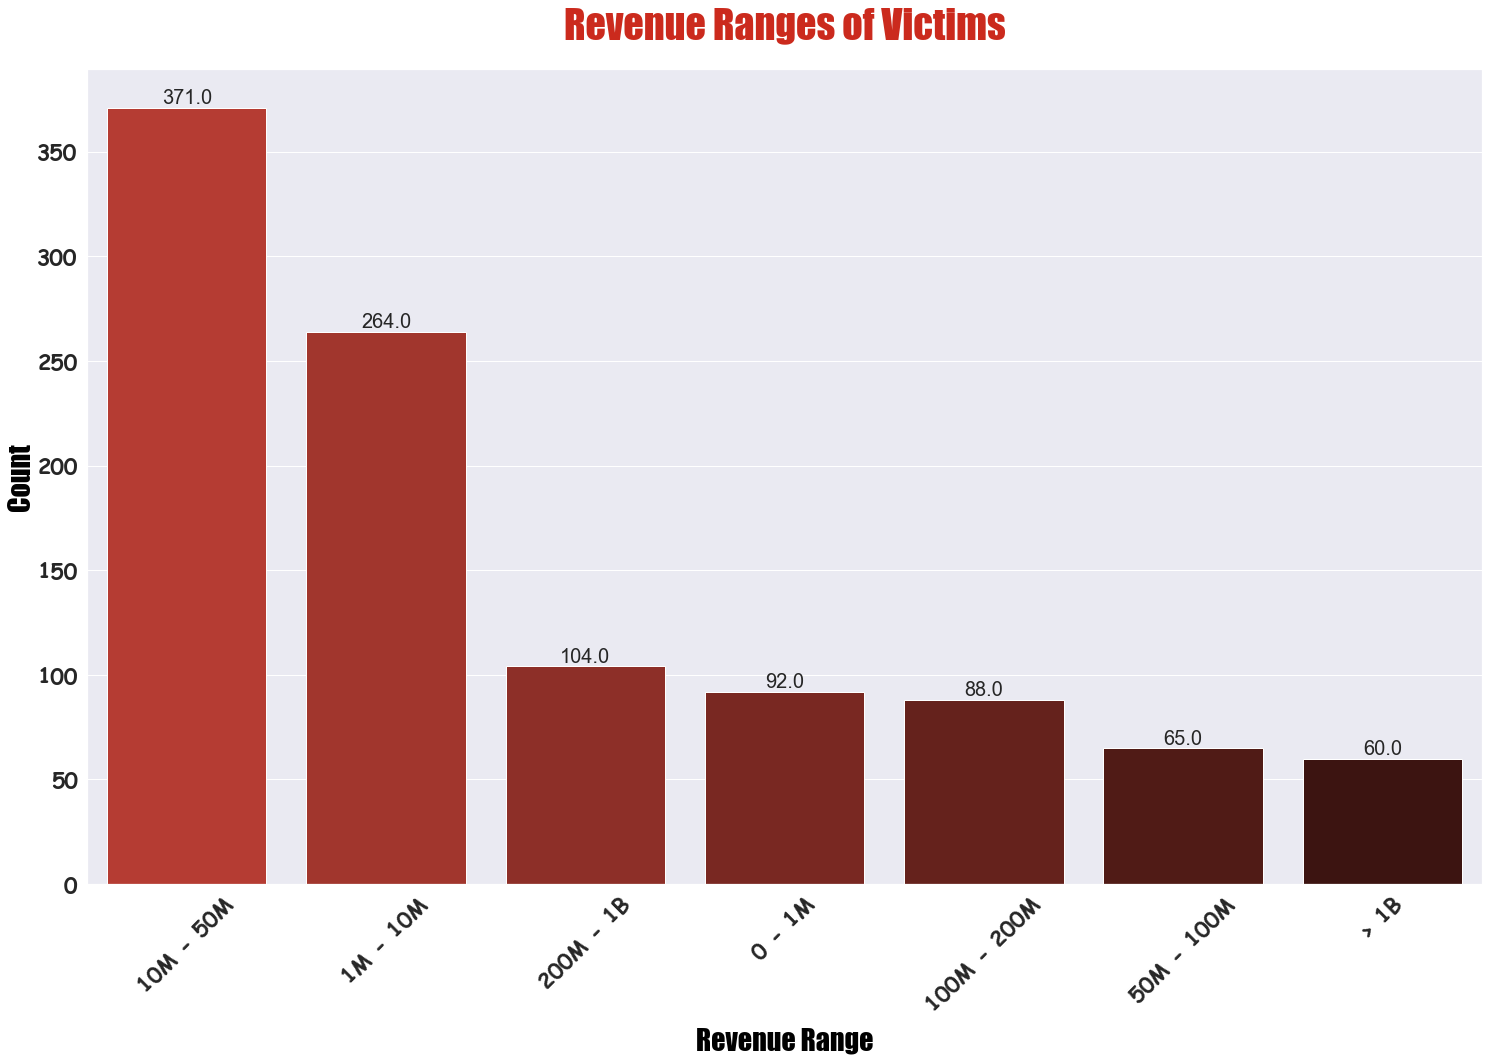

In [38]:
sns.set_theme('notebook', style='darkgrid')
# draw a count plot for the revenue range column
plt.figure(figsize=(25, 15))
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
ax = sns.countplot(x='revenue_range', data=df_attacked_revenue, order=df_attacked_revenue['revenue_range'].value_counts().index, palette=color_palette)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=20)
plt.xticks(rotation=45, fontsize=22, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=22, fontweight='bold', fontfamily='cursive')
plt.title('Revenue Ranges of Victims', fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Revenue Range', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Count', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'})
# add a border to the plot
# add the right padding to the plot
plt.show()


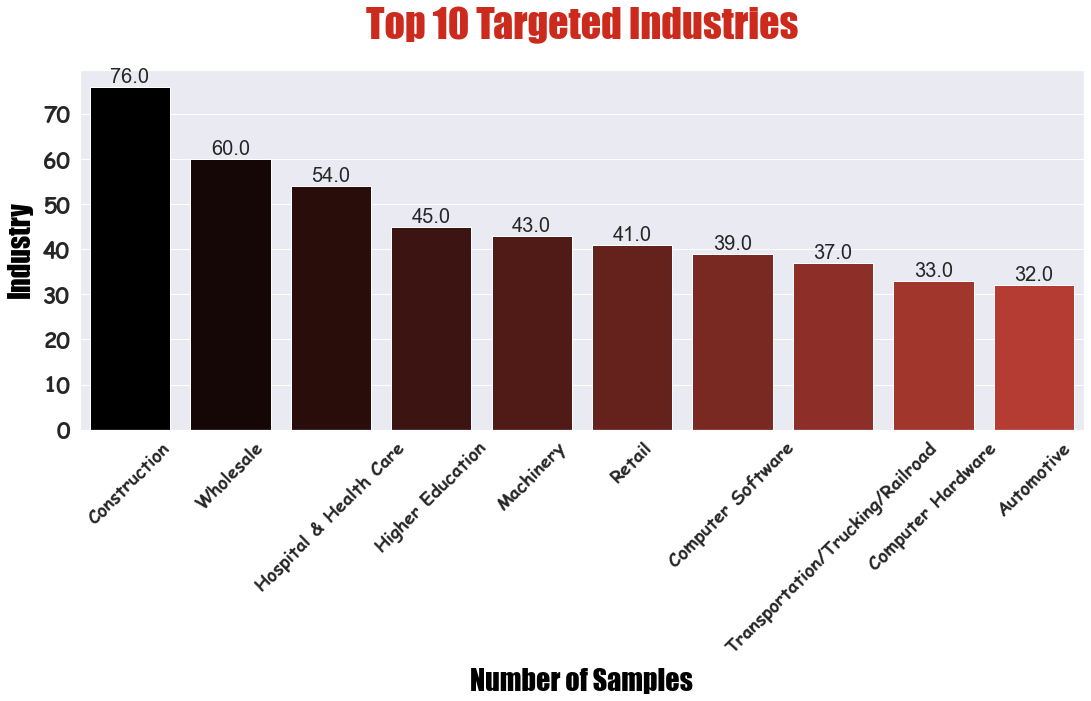

In [118]:
# plot the number of samples for top 10 industries in the data set
plt.figure(figsize=(18, 8))
# set the slides to be 60% of the height of the screen
plt.subplots_adjust(top=0.75)
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
ax = sns.countplot(x='industry', data=df_attacked_industry, order=df_attacked_industry['industry'].value_counts().iloc[:10].index, palette=color_palette[::-1])
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=20)
plt.xticks(rotation=45, fontsize=18, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=22, fontweight='bold', fontfamily='cursive')
plt.title('Top 10 Targeted Industries', fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Number of Samples', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Industry', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.show()

In [21]:
# get the companies whose last_seen is before today
df_attacked['last_seen'] = pd.to_datetime(df_attacked['last_seen'])
# get the day of ["last_seen"]
df_attacked['last_seen_day'] = df_attacked['last_seen'].dt.day
# get the month of ["last_seen"]
df_attacked['last_seen_month'] = df_attacked['last_seen'].dt.month
# get the year of ["last_seen"]
df_attacked['last_seen_year'] = df_attacked['last_seen'].dt.year
# get the company that paid, a company who has paid is the company whose last_seen is before the max date
date = df_attacked['last_seen'].max()
# adds a new column to the data frame that indicates whether the company paid or not
df_attacked['paid'] = df_attacked['last_seen'].apply(lambda x: False)
# get the companies that paid and set the paid column to True
df_attacked.loc[((df_attacked['last_seen_day']< date.day) & (df_attacked['last_seen_month']== date.month) )|
  (df_attacked['last_seen_month']< date.month) | (df_attacked['last_seen_year']< date.year), 'paid'] = True
  

df_attacked.head()

,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,revenue,revenue_range,source,technologies_used,views,year_founded,last_seen_day,last_seen_month,last_seen_year,paid
0,645654cf7adef2f79c969d2d,0.0,joysonsafety.com,active,We took 20TB of data from the company and are ...,United States,"11 May, 2023 19:57:59 UTC",Joyson Safety Systems is a global leader in mo...,Joyson Safety Systems,NaN,...,NaN,NaN,lockbit,"[""WordPress""]",5643.0,NaN,14,5,2023,False
1,645654d37adef2f79c969d2e,4.0,layherna.com,active,Layher North America is a company that operate...,United States,"10 May, 2023 07:41:18 UTC",Layher is the world's largest producer and lea...,LAYHER INC,NaN,...,NaN,200M - 1B,lockbit,"[""Amazon Cloudfront"",""Google Tag Manager"",""Sal...",5592.0,1986.0,14,5,2023,False
2,645654e37adef2f79c969d2f,0.0,fullertonindia.com,active,"Founded in 1994 and headquartered in Mumbai, I...",India,"03 May, 2023 19:34:31 UTC",Fullerton India Credit Company Limited is regi...,Fullerton India Credit Company Limited,NaN,...,NaN,> 1B,lockbit,"[""Amazon Cloudfront"",""CloudFlare"",""Google Doub...",11187.0,1994.0,14,5,2023,False
3,645654e77adef2f79c969d30,0.0,triaflex.at,active,Welcome to TRIAFLEX\nWe design the ergonomic l...,Austria,"17 May, 2023 15:44:34 UTC",NaN,Triaflex Innovative Sitz-und Gesundheitssysteme,NaN,...,NaN,NaN,lockbit,"[""Google Analytics"",""Google Tag Manager""]",5619.0,NaN,14,5,2023,False
4,645654ea7adef2f79c969d31,0.0,cydsa.com,active,"Cydsa, S.A.B. de C.V., together its subsidiari...",Mexico,"08 May, 2023 01:15:09 UTC",Cydsa SAB de CV (Cydsa) is a Mexico-based hold...,Cydsa SAB de CV,1690,...,4.4832e+08,200M - 1B,lockbit,"[""MaxCDN"",""WordPress""]",6274.0,1945.0,14,5,2023,False


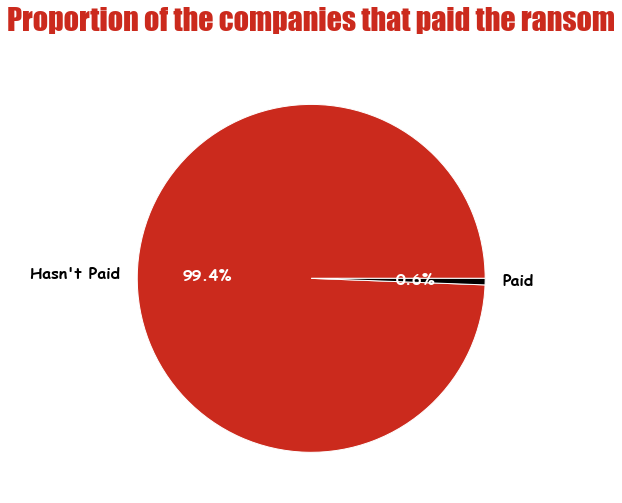

In [39]:
# plot bar plot for ispublished column and display the count for each category on the top of the bar
color_palette = sns.color_palette("blend:#CB2A1D,#000", 2)
# draw a pie chart for the ispublished column and remove the borders from it
plt.figure(figsize=(10, 8))
_, _, autotexts = plt.pie(df_attacked['paid'].value_counts(), labels=['Hasn\'t Paid', 'Paid'], autopct='%1.1f%%', colors=color_palette, textprops={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'cursive', 'color': 'black' }, wedgeprops={'linewidth': 1})
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Proportion of the companies that paid the ransom', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30)
plt.show()

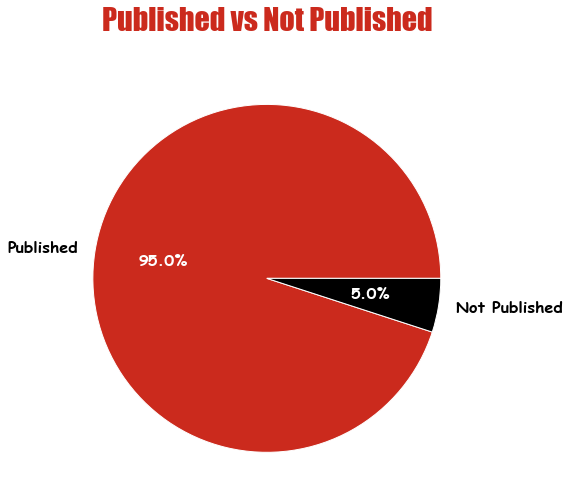

In [18]:
# plot bar plot for ispublished column and display the count for each category on the top of the bar
color_palette = sns.color_palette("blend:#CB2A1D,#000", 2)
# draw a pie chart for the ispublished column and remove the borders from it
plt.figure(figsize=(10, 8))
_, _, autotexts = plt.pie(df_attacked['ispublished'].value_counts(), labels=['Published', 'Not Published'], autopct='%1.1f%%', colors=color_palette, textprops={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'cursive', 'color': 'black' }, wedgeprops={'linewidth': 1})
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Published vs Not Published', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30)
plt.show()

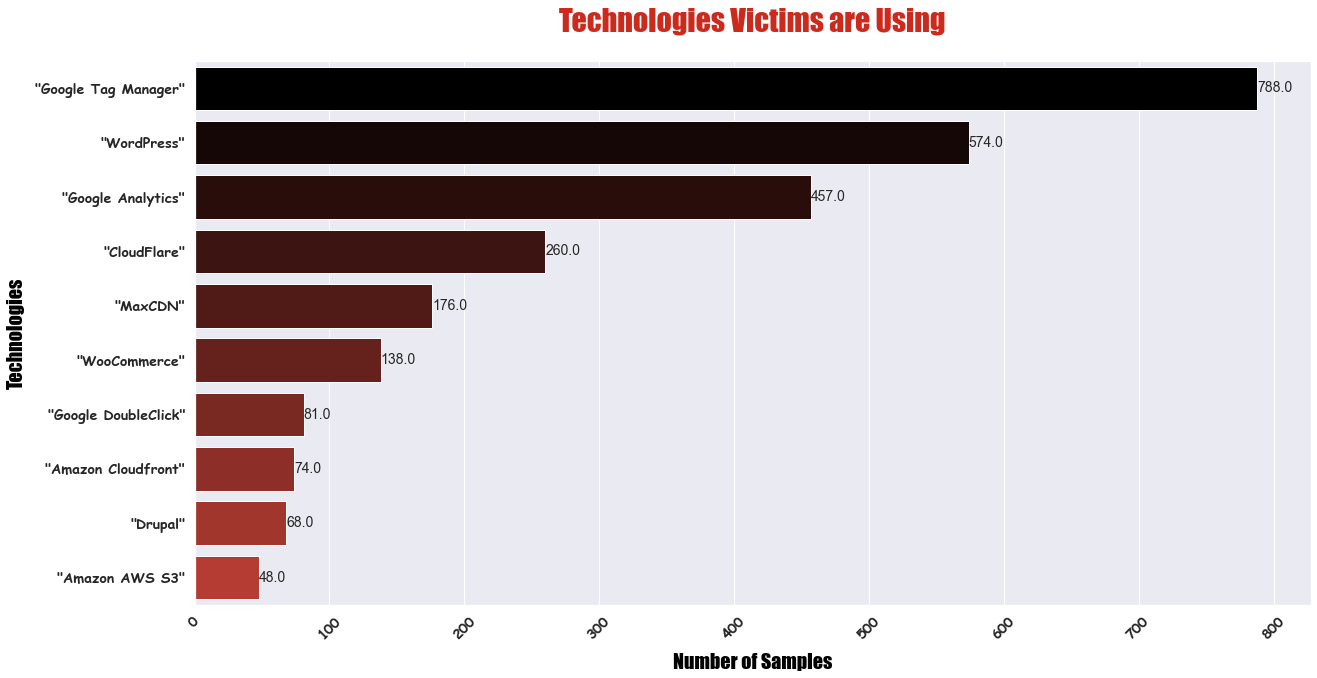

In [119]:
# count the number of empty lists in the `technologies_used` column
# count nulls first
df_attacked_technologies = df_attacked.copy()
col = df_attacked_technologies['technologies_used'].dropna()
# count empty lists
new_col = col.apply(lambda x:  1 if len(x)== 2 else 0)
col2= df_attacked.copy()
# drop nulls in the `technologies_used` column
col2.dropna(subset=['technologies_used'], inplace=True)
new_col2 = col2[col2["technologies_used"]!="[]"]
techs = new_col2['technologies_used'].apply(lambda x: x[1:-1].split(','))
#count each technology
techs = techs.explode()
# plot the top 10 technologies used by companies
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
plt.figure(figsize=(20, 10))
ax = sns.countplot(y=techs, order=techs.value_counts().iloc[:10].index, palette=color_palette[::-1])
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=14)
plt.xticks(rotation=45, fontsize=14, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=14, fontweight='bold', fontfamily='cursive')
plt.title('Technologies Victims are Using', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Number of Samples', fontdict={'fontsize': 20, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Technologies', fontdict={'fontsize': 20, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.show()


<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



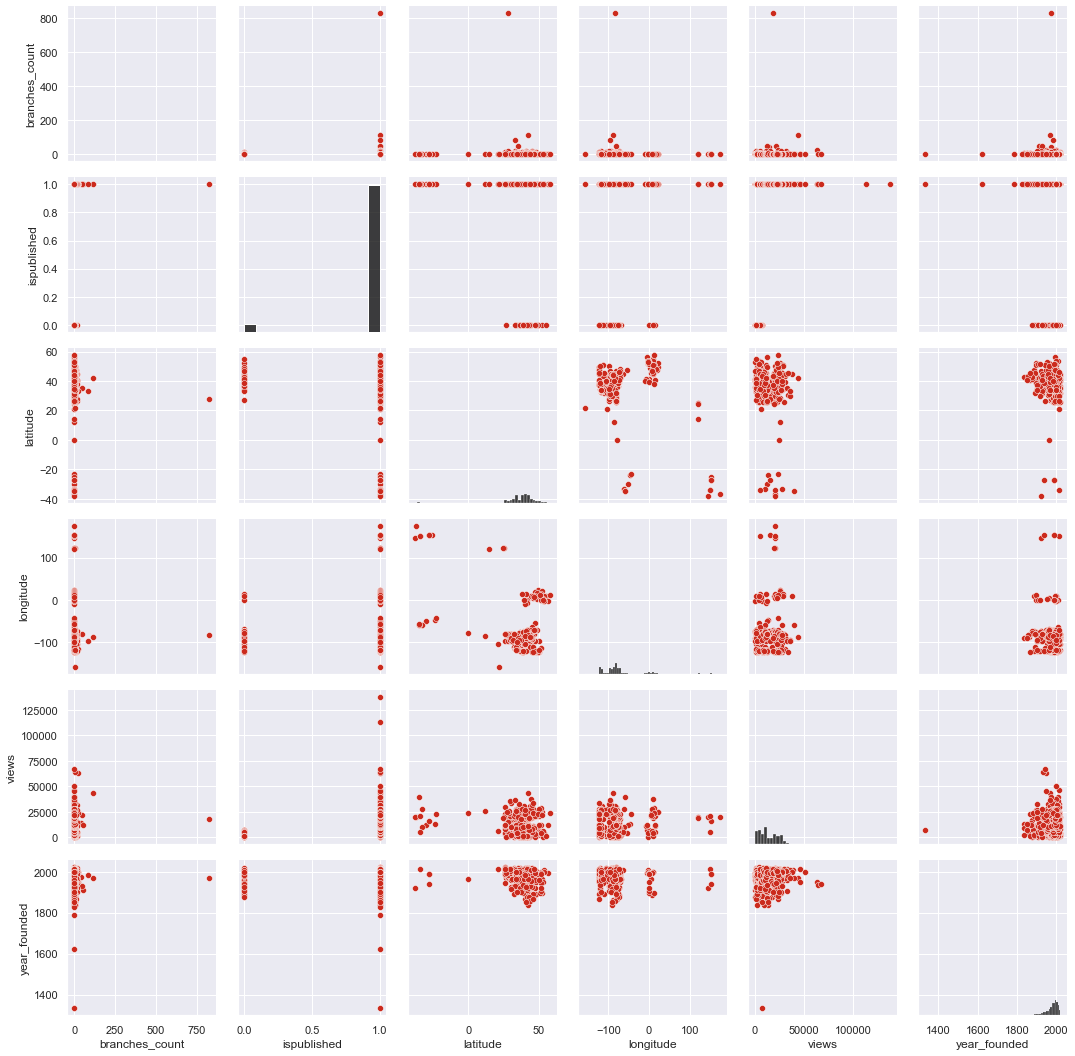

In [120]:
sns.set_theme('notebook', style='darkgrid')
g = sns.PairGrid(df_attacked, palette=color_palette)
g.map_upper(sns.scatterplot,color='#CB2A1D')
g.map_lower(sns.scatterplot, color='#CB2A1D')
g.map_diag(sns.histplot, color='#000')
plt.show()

# Fragment

Press the right arrow.

- I am a Fragement

- I am another one

# Markdown Examples

#### Text

It's very easy to make some words **bold** and other words *italic* with Markdown. You can even [link to Google!](http://google.com)

# Headline Subslide
#### Code

```javascript
var s = "JavaScript syntax highlighting";
alert(s);
```
 
```python
s = "Python syntax highlighting"
print s
```
 
```
No language indicated, so no syntax highlighting. 
But let's throw in a <b>tag</b>.
```

# Python example

#### Code
```python
# This program adds up integers in the command line
import sys
try:
    total = sum(int(arg) for arg in sys.argv[1:])
    print 'sum =', total
except ValueError:
    print 'Please supply integer arguments'
```

# Headline Subslide

#### Lists

Sometimes you want numbered lists:

1. Item 1
2. Item 2
3. Item 3
   * Item 3a
   * Item 3b


# Headline Subslide

#### Lists

Sometimes you want bullet points:

* Item 1
* Item 2
  * Item 2a
  * Item 2b
* This is a long long long long long long long long long long long long long long long long long long long long long long long long long list

# Headline Subslide
#### Blockquotes

As Kanye West said:

> We're living the future so
> the present is our past.

#### inline code
I think you should use an
`<addr>` element here instead.

# Table

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

# Images
If you want to embed images, this is how you do it:

![Color](img/colorcontext.png)

# Links

- https://guides.github.com/features/mastering-markdown/

- https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

### Q&A Slide